In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
import toolbox as tb
import kaggleData as kD

Populating the interactive namespace from numpy and matplotlib


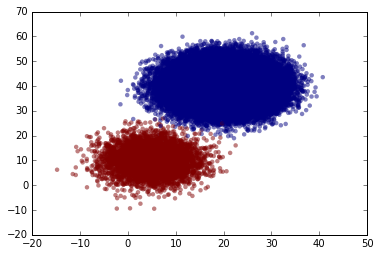

In [14]:
#toydata shall have n vectors with 5 dimensions
n = 100000
#probability for signal-label
s_prob = 0.05
dim = 4
data = tb.createToyData(n,dim,s_prob)
weights = data[:,0]
labels = data[:,1]
x_1 = data[:,2]
x_2 = data[:,3]

%pylab inline
plt.scatter(x_1, x_2, edgecolor="", c=labels, alpha=0.5)

For Comparison, we calculate the best possible AMS    
(case: every signal correctly detected)

In [23]:
tb.calcMaxAMS(weights,labels);

Found 5001 signals.
Weightsums signal: 124.616216173 | background: 0
Maximum AMS possible with this Data: 21.230392524135638


prepare (=normalize) data

In [24]:
X=data[:,2:4]
X /= np.max(np.abs(X),axis=0)

In [25]:
n_train = int(n/10)

train_X,test_X = tb.splitList(X,n_train)
train_labels,test_labels = tb.splitList(labels,n_train)
test_weights = tb.splitList(weights,n_train)[1]

In [26]:
tb.calcMaxAMS(test_weights,test_labels);

Found 4532 signals.
Weightsums signal: 112.195582691 | background: 0
Maximum AMS possible with this Data: 19.680679885381696


classify with knN

In [27]:
neigh = neighbors.KNeighborsClassifier(n_neighbors=5)
neigh.fit(train_X,train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform')

In [28]:
test_X[:,1]

array([ 0.72336419,  0.62206831,  0.64146325, ...,  0.65279984,
        0.677622  ,  0.60642113])

In [29]:
pred = neigh.predict(test_X)

Populating the interactive namespace from numpy and matplotlib


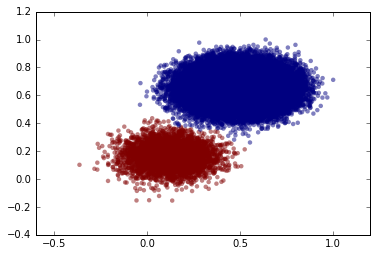

In [30]:
%pylab inline
plt.scatter(test_X[:,0], test_X[:,1], edgecolor="", c=pred, alpha=0.5)

In [32]:
s,b = tb.calcWeightSums(test_weights,pred,test_labels)
print("AMS:",tb.calcAMS(s,b))

AMS: 18.96234200027604


Let's use Kaggle-Data:

In [33]:
#csvDict,header = kD.createCsvDictionary();

In [34]:
(header,
 test_data,
 test_weights,
 test_labels,
 train_data,
 train_weights,
 train_labels) = kD.getWholeDataSet(kSet="v")

In [35]:
train_eventList,test_eventList = kD.getFeatureSets("EventId",header,test_data,train_data)

In [54]:
(train_DER_met_phi_centrality,
 test_DER_met_phi_centrality) = kD.getFeatureSets("DER_met_phi_centrality",header,test_data,train_data)
(train_DER_pt_ratio_lep_tau,
 test_DER_pt_ratio_lep_tau) = kD.getFeatureSets("DER_pt_ratio_lep_tau",header,test_data,train_data)

In [55]:
train_labels = np.array(train_labels).transpose()
test_labels = np.array(test_labels).transpose()

In [56]:
tb.calcMaxAMS(test_weights,test_labels);

Found 153683 signals.
Weightsums signal: 691.988607714 | background: 0
Maximum AMS possible with this Data: 67.71112289514156


In [57]:
train_X_1 = train_DER_met_phi_centrality
train_X_2 = train_DER_pt_ratio_lep_tau

train_X = np.zeros(shape = (len(train_X_1),2),dtype=float)
train_X[:,0] = train_X_1[:]
train_X[:,1] = train_X_2[:]

In [58]:
test_X_1 = test_DER_met_phi_centrality
test_X_2 = test_DER_pt_ratio_lep_tau

test_X = np.zeros(shape = (len(test_X_1),2),dtype=float)
test_X[:,0] = test_X_1[:]
test_X[:,1] = test_X_2[:]

In [59]:
neigh = neighbors.KNeighborsClassifier(n_neighbors=4)
neigh.fit(train_X,train_labels)
pred = neigh.predict(test_X)

In [60]:
s,b = tb.calcWeightSums(test_weights,pred,test_labels)
print("AMS:",tb.calcAMS(s,b))

AMS: 0.9845511601614052


In [61]:
train_X_1 /= np.max(np.abs(train_X_1),axis=0)
train_X_2 /= np.max(np.abs(train_X_2),axis=0)
train_X[:,0] = train_X_1[:]
train_X[:,1] = train_X_2[:]
test_X_1 /= np.max(np.abs(test_X_1),axis=0)
test_X_2 /= np.max(np.abs(test_X_2),axis=0)
test_X[:,0] = test_X_1[:]
test_X[:,1] = test_X_2[:]
neigh = neighbors.KNeighborsClassifier(n_neighbors=4)
neigh.fit(train_X,train_labels)
pred = neigh.predict(test_X)
s,b = tb.calcWeightSums(test_weights,pred,test_labels)
print("AMS:",tb.calcAMS(s,b))

AMS: 0.9845511601614052


In [45]:
def bestN(n_range,train_X,test_X,test_weights,test_labels):
    for n in n_range:
        neigh = neighbors.KNeighborsClassifier(n_neighbors=n)
        neigh.fit(train_X,train_labels)
        pred = neigh.predict(test_X)
        s,b = tb.calcWeightSums(test_weights,pred,test_labels)
        print("n=", n, "| AMS:",tb.calcAMS(s,b))

In [46]:
neigh = neighbors.KNeighborsClassifier(n_neighbors=200)
neigh.fit(train_X,train_labels)
pred = neigh.predict(test_X)
s,b = tb.calcWeightSums(test_weights,pred,test_labels)
print("AMS:",tb.calcAMS(s,b))

AMS: 1.4381473965255993


In [66]:
neigh = neighbors.KNeighborsClassifier(n_neighbors=3)
neigh.fit(train_data,train_labels)
pred = neigh.predict(test_data)
s,b = tb.calcWeightSums(test_weights,pred,test_labels)
print("AMS:",tb.calcAMS(s,b))

AMS: 0.5902361790963697
